In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [85]:
df=pd.read_csv('datasets/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

In [86]:
df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,highCrime
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,...,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06,0
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,...,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14,1
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,...,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00,1
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,...,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23,1
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,...,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15,1


In [87]:
cols = ['communityname','state','ViolentCrimesPerPop','fold']
df.drop(cols,axis=1,inplace=True)

<AxesSubplot:xlabel='highCrime', ylabel='count'>

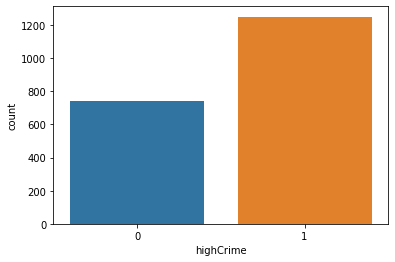

In [88]:
sns.countplot(x='highCrime',data=df)

In [89]:
X = df.drop(['highCrime'],axis=1)
y = df['highCrime']

In [76]:
data_matrix = xgb.DMatrix(data=X, label=y)
data_matrix

In [77]:
params = {
    'learning_rate':.1,
    'max_depth':5,
    'alpha':10,
}

In [78]:
result = xgb.cv(dtrain= data_matrix,
                params= params,
                nfold = 5,
                num_boost_round=100,
                early_stopping_rounds=10,
                metrics='rmse',
                seed = 0 )

In [31]:
result

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.474827,0.000143,0.477641,0.000469
1,0.452760,0.000517,0.458262,0.000979
2,0.433575,0.000823,0.441493,0.001243
3,0.417038,0.000810,0.427204,0.001712
4,0.402106,0.000661,0.414893,0.001957
5,0.389291,0.000949,0.404167,0.002457
6,0.377899,0.001079,0.395302,0.002793
7,0.368179,0.001369,0.387346,0.002801
8,0.359254,0.001601,0.380443,0.003276
9,0.351833,0.001730,0.375218,0.003481


<AxesSubplot:>

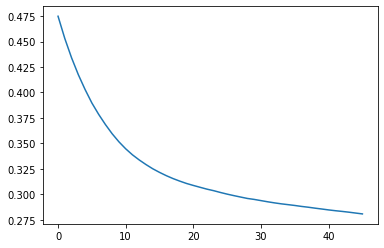

In [28]:
result['train-rmse-mean'].plot()

In [32]:
gridsearch_params = [ 
    (max_depth, min_child_weight,learning_rate)
    for max_depth in range(3,12)
    for min_child_weight in range(5,10)
    for learning_rate in np.arange(.1,1,.05)
]

In [33]:
# initial parameter for variable
min_rmse = float('inf')
best_params = None

for max_depth,min_child_weight,lr in gridsearch_params:
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    params['learning_rate'] = lr
    result = xgb.cv(dtrain= data_matrix,
                    params= params,
                    nfold = 3,
                    num_boost_round=100,
                    early_stopping_rounds=10,
                    metrics='rmse', # rmse or mse or mae
                    seed = 0 )
    mean_rmse = result['test-rmse-mean'].min()
    boost_rounds = result['test-rmse-mean'].argmin()
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight,lr)

        
print(f'Best params: {best_params[0]},{best_params[1]},{best_params[2]} with rmse: {min_rmse}')

Best params: 5,8,0.20000000000000004 with rmse: 0.3437346666666667


In [34]:
params['learning_rate'] = .2
params['max_depth'] = 5
params['alpha'] = 10
params['min_child_weight'] = 9
params

{'learning_rate': 0.2, 'max_depth': 5, 'alpha': 10, 'min_child_weight': 9}

In [37]:
tx,testx,ty,testy = train_test_split(X,y,random_state=0)
dtrain = xgb.DMatrix(data=tx, label=ty)
dtest = xgb.DMatrix(data=testx, label=testy)

In [38]:

model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtest,'Test')],
    early_stopping_rounds=10
)

[0]	Test-rmse:0.45692
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:0.42584
[2]	Test-rmse:0.40167
[3]	Test-rmse:0.38598
[4]	Test-rmse:0.37436
[5]	Test-rmse:0.36588
[6]	Test-rmse:0.36026
[7]	Test-rmse:0.35605
[8]	Test-rmse:0.35336
[9]	Test-rmse:0.35184
[10]	Test-rmse:0.34994
[11]	Test-rmse:0.34892
[12]	Test-rmse:0.34851
[13]	Test-rmse:0.34792
[14]	Test-rmse:0.34714
[15]	Test-rmse:0.34760
[16]	Test-rmse:0.34745
[17]	Test-rmse:0.34722
[18]	Test-rmse:0.34679
[19]	Test-rmse:0.34716
[20]	Test-rmse:0.34708
[21]	Test-rmse:0.34722
[22]	Test-rmse:0.34684
[23]	Test-rmse:0.34619
[24]	Test-rmse:0.34594
[25]	Test-rmse:0.34572
[26]	Test-rmse:0.34572
[27]	Test-rmse:0.34572
[28]	Test-rmse:0.34572
[29]	Test-rmse:0.34572
[30]	Test-rmse:0.34572
[31]	Test-rmse:0.34572
[32]	Test-rmse:0.34572
[33]	Test-rmse:0.34572
[34]	Test-rmse:0.34572
[35]	Test-rmse:0.34572
Stopping. Best iteration:
[25]	Test-rmse:0.34572



In [39]:
num_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_round,
    evals=[(dtest,'Test')]
)

[0]	Test-rmse:0.45692
[1]	Test-rmse:0.42584
[2]	Test-rmse:0.40167
[3]	Test-rmse:0.38598
[4]	Test-rmse:0.37436
[5]	Test-rmse:0.36588
[6]	Test-rmse:0.36026
[7]	Test-rmse:0.35605
[8]	Test-rmse:0.35336
[9]	Test-rmse:0.35184
[10]	Test-rmse:0.34994
[11]	Test-rmse:0.34892
[12]	Test-rmse:0.34851
[13]	Test-rmse:0.34792
[14]	Test-rmse:0.34714
[15]	Test-rmse:0.34760
[16]	Test-rmse:0.34745
[17]	Test-rmse:0.34722
[18]	Test-rmse:0.34679
[19]	Test-rmse:0.34716
[20]	Test-rmse:0.34708
[21]	Test-rmse:0.34722
[22]	Test-rmse:0.34684
[23]	Test-rmse:0.34619
[24]	Test-rmse:0.34594
[25]	Test-rmse:0.34572


In [40]:
pred = best_model.predict(dtest)
np.sqrt(mean_squared_error(testy,pred))

0.34572443679370923

In [58]:
pred = best_model.predict(data_matrix)
np.sqrt(mean_squared_error(y,pred))

0.2937989177514904

In [43]:
best_model.save_model('crime.model')

# loading model

In [44]:
loaded_model = xgb.Booster()
loaded_model.load_model('crime.model')

In [45]:
loaded_model.predict(dtest)

array([ 0.37479758,  0.7868502 ,  1.0009881 ,  0.9543872 ,  0.01351413,
        0.9772722 ,  0.6141822 ,  1.0046365 , -0.02874017,  0.7010499 ,
        0.19950503,  0.4652192 ,  0.14325437,  0.9986548 ,  0.345024  ,
        1.0201548 ,  0.96037483,  0.03392988,  0.8302587 ,  1.0403874 ,
        0.17250904,  0.97377974,  0.22946465,  0.7755753 ,  1.0170567 ,
        0.27595603,  0.7181654 ,  0.40973482,  0.10333201,  0.01923668,
        0.24543488,  0.9618696 ,  0.5705885 ,  0.35634294,  0.22446364,
        0.05412793,  0.8447565 ,  0.17916483,  1.0222232 ,  0.34782586,
        0.1091994 ,  0.24717104,  0.23604226,  0.45543736,  0.5791487 ,
        0.7794554 ,  0.6452563 ,  0.03158659,  1.024429  ,  0.36772645,
        0.05734751,  0.61741954,  0.7474556 ,  0.88932097,  0.36723587,
        0.5684133 ,  0.09798092,  1.0110524 ,  0.05577174,  0.93397605,
        0.4187256 ,  0.9531957 ,  1.022953  ,  0.90381217,  0.9924118 ,
        0.3400514 ,  0.2900015 ,  0.76637197,  0.9730892 ,  0.84

In [102]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.37%


In [103]:
model.save_model('models/crime.model')

In [104]:
X.columns

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
       'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecI

In [109]:
loaded_model = xgb.XGBClassifier()
loaded_model.load_model('models/crime.model')

In [111]:
loaded_model.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,